In [ ]:
# import auto_encoder
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
#from tensorflow.keras.layers import Input
#from tensorflow.keras.models import Model
import tensorflow.keras as keras
from tensorflow.keras import layers
import tensorflow as tf


from google.colab import drive
drive.mount('/content/drive/')


#tf.config.experimental.enable_mlir_graph_optimization()

def load_images(folder_path):
    image_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            # Read image
            img = cv2.imread(os.path.join(folder_path, filename))
            # Convert to one channel
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Preform normalization and convert to np array
            img_array = np.array(img) / 255.0
            # Fallten image
            #img_array = img_array.flatten()
            image_list.append(img_array)
    return np.array(image_list)

folder_path = "/content/drive/My Drive/2023_spring/DS340/data/process_image_color"
x_data = load_images(folder_path)

# Split the data into train and validation sets
x_train, x_val = train_test_split(x_data, test_size=0.1, random_state=42)

# This is the size of our encoded representations




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
x_train.shape

(2250, 64, 64)

In [ ]:
# Fully Connected Autoencoder
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D, Dropout
from keras.models import Model
from tensorflow.keras import regularizers
## input layer
input_layer = Input(shape=(4096,))

## encoding architecture
encode_layer1 = Dense(2048, activation='relu',bias_regularizer = regularizers.L2(1e-4))(input_layer)
#encode_layer2 = Dense(1024, activation='LeakyReLU')(encode_layer1)
encode_layer3 = Dense(512, activation='relu',bias_regularizer = regularizers.L2(1e-4))(encode_layer1)

## latent view
latent_view   = Dense(256, activation='relu')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(512, activation='relu',bias_regularizer = regularizers.L2(1e-4))(latent_view)
#decode_layer2 = Dense(1024, activation='LeakyReLU')(decode_layer1)
decode_layer3 = Dense(2048, activation='relu',bias_regularizer = regularizers.L2(1e-4))(decode_layer1)

## output layer
output_layer  = Dense(4096, activation='sigmoid')(decode_layer3)

model = Model(input_layer, output_layer)



In [ ]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 4096)]            0         
                                                                 
 dense_80 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_81 (Dense)            (None, 512)               1049088   
                                                                 
 dense_82 (Dense)            (None, 256)               131328    
                                                                 
 dense_83 (Dense)            (None, 512)               131584    
                                                                 
 dense_84 (Dense)            (None, 2048)              1050624   
                                                                 
 dense_85 (Dense)            (None, 4096)              8392

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

model.fit(x_train, x_train,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(x_val, x_val))


predicted = model.predict(x_val)

NameError: ignored

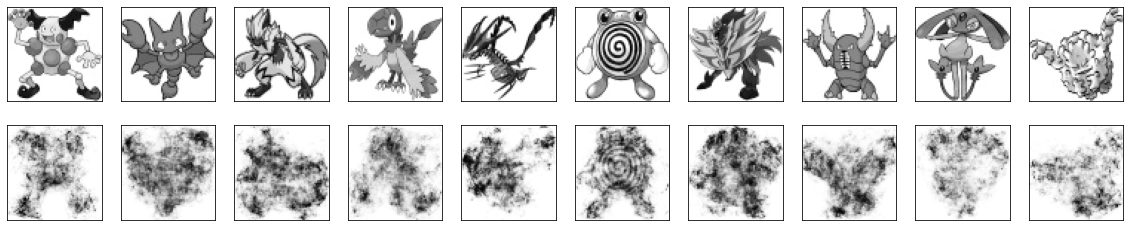

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, save_model

# Encoder
input_img = Input(shape=(64, 64, 1))
x = Conv2D(32, (3, 3), activation='LeakyReLU', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='LeakyReLU', padding='same')(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='LeakyReLU', padding='same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='LeakyReLU', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 16)        4624      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 16)       64  

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(x_val, x_val))

predicted = autoencoder.predict(x_val)


Epoch 1/100
71/71 [==============================] - 4s 10ms/step - loss: 0.5201 - val_loss: 0.5113
Epoch 2/100
71/71 [==============================] - 0s 6ms/step - loss: 0.3559 - val_loss: 0.4830
Epoch 3/100
71/71 [==============================] - 0s 7ms/step - loss: 0.3350 - val_loss: 0.4704
Epoch 4/100
71/71 [==============================] - 0s 7ms/step - loss: 0.3295 - val_loss: 0.4454
Epoch 5/100
71/71 [==============================] - 0s 7ms/step - loss: 0.3261 - val_loss: 0.4158
Epoch 6/100
71/71 [==============================] - 0s 6ms/step - loss: 0.3250 - val_loss: 0.4055
Epoch 7/100
71/71 [==============================] - 0s 6ms/step - loss: 0.3234 - val_loss: 0.3500
Epoch 8/100
71/71 [==============================] - 0s 7ms/step - loss: 0.3226 - val_loss: 0.3387
Epoch 9/100
71/71 [==============================] - 0s 6ms/step - loss: 0.3204 - val_loss: 0.3192
Epoch 10/100
71/71 [==============================] - 0s 7ms/step - loss: 0.3209 - val_loss: 0.3148
Epoch 11

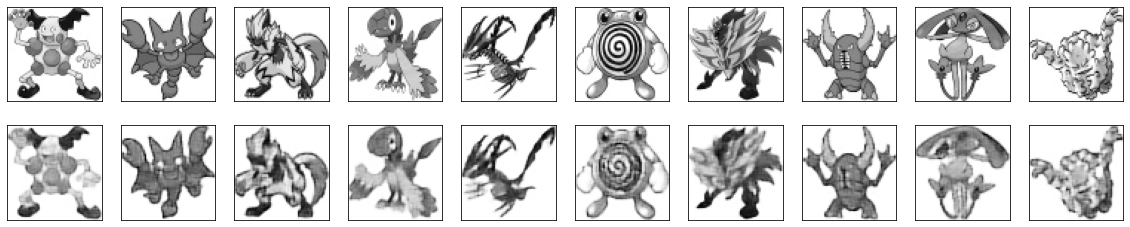

In [ ]:

import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# import auto_encoder
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
#from tensorflow.keras.layers import Input
#from tensorflow.keras.models import Model
import tensorflow.keras as keras
from tensorflow.keras import layers
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive/')


tf.config.experimental.enable_mlir_graph_optimization()

def load_images(folder_path):
    image_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            # Read image
            img = cv2.imread(os.path.join(folder_path, filename))
            # Convert to one channel
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Preform normalization and convert to np array
            img_array = np.array(img) / 255.0
            # Fallten image
            img_array = img_array.flatten()
            image_list.append(img_array)
    return np.array(image_list)

folder_path = "/content/drive/My Drive/2023_spring/DS340/process_images"
x_data = load_images(folder_path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
x_data.shape

(2500, 4096)